# Movie recommendation system !

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
meta= pd.read_csv(r"C:\Users\jasva\Downloads\movies_metadata.csv\movies_metadata.csv")
meta.head()

C:\Users\jasva\AppData\Local\Temp\ipykernel_7240\4227333956.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta= pd.read_csv(r"C:\Users\jasva\Downloads\movies_metadata.csv\movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
meta= meta[['id', 'original_title', 'original_language']]
meta= meta.rename(columns={'id':'movieId'})
meta = meta[meta['original_language']== 'en'] #English movies only
meta.head()

,movieId,original_title,original_language
0,862,Toy Story,en
1,8844,Jumanji,en
2,15602,Grumpier Old Men,en
3,31357,Waiting to Exhale,en
4,11862,Father of the Bride Part II,en


In [4]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32269 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movieId            32269 non-null  object
 1   original_title     32269 non-null  object
 2   original_language  32269 non-null  object
dtypes: object(3)
memory usage: 1008.4+ KB


In [5]:
meta.shape

(32269, 3)

In [6]:
meta.isna().sum()

movieId              0
original_title       0
original_language    0
dtype: int64

In [7]:
meta.describe()

,movieId,original_title,original_language
count,32269,32269,32269
unique,32251,30493,1
top,23305,Hamlet,en
freq,2,8,32269


In [8]:
meta.tail()

,movieId,original_title,original_language
45459,222848,Caged Heat 3000,en
45460,30840,Robin Hood,en
45463,67758,Betrayal,en
45464,227506,Satana likuyushchiy,en
45465,461257,Queerama,en


In [9]:
ratings= pd.read_csv(r"C:\Users\jasva\Downloads\ratings.csv\ratings.csv")
ratings= ratings[['userId', 'movieId', 'rating']]
ratings=ratings.head(1000000)

In [10]:
ratings.head()

,userId,movieId,rating
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0
3,1,1221,5.0
4,1,1246,5.0


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   userId   1000000 non-null  int64  
 1   movieId  1000000 non-null  int64  
 2   rating   1000000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 22.9 MB


In [12]:
ratings.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [13]:
ratings.describe()

,userId,movieId,rating
count,1000000.000000,1000000.000000,1000000.000000
mean,5133.776150,16215.274514,3.539662
std,2924.500401,31323.848487,1.042568
min,1.000000,1.000000,0.500000
25%,2609.000000,1079.000000,3.000000
50%,5178.000000,2641.000000,3.500000
75%,7609.000000,6664.000000,4.000000
max,10183.000000,176271.000000,5.000000


In [14]:
ratings.tail()

,userId,movieId,rating
999995,10183,380,4.0
999996,10183,381,4.0
999997,10183,410,3.0
999998,10183,415,4.0
999999,10183,419,2.0


In [15]:
#converting data types before merging
meta.movieId =pd.to_numeric(meta.movieId, errors='coerce')
ratings.movieId = pd.to_numeric(ratings.movieId, errors= 'coerce')

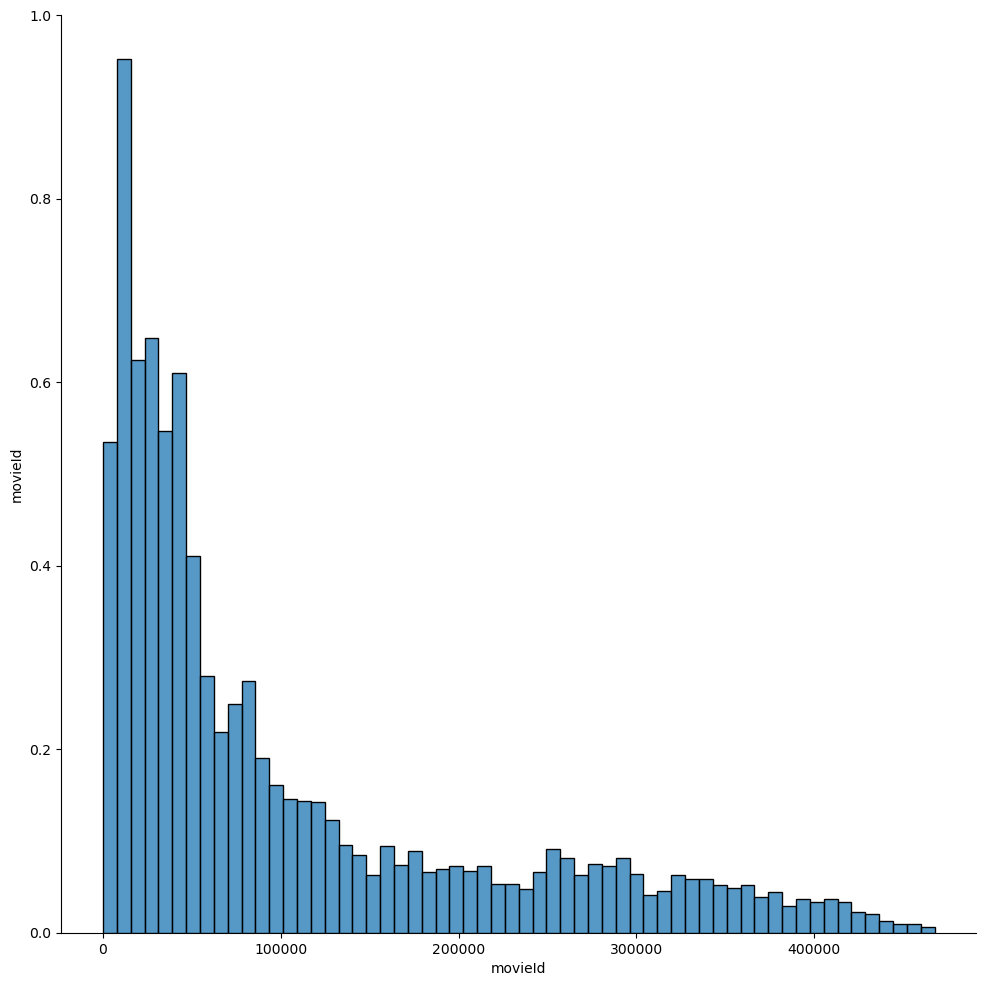

In [16]:
sns.pairplot(meta,height=10)
plt.show()

In [17]:
data= pd.merge(ratings, meta, on='movieId', how='inner')
data.head()

,userId,movieId,rating,original_title,original_language
0,1,858,5.0,Sleepless in Seattle,en
1,3,858,4.0,Sleepless in Seattle,en
2,5,858,5.0,Sleepless in Seattle,en
3,12,858,4.0,Sleepless in Seattle,en
4,20,858,4.5,Sleepless in Seattle,en


In [18]:
matrix= data.pivot_table(index='userId', columns='original_title', values='rating')
matrix.head()

original_title,!Women Art Revolution,$5 a Day,'Gator Bait,'R Xmas,'Twas the Night Before Christmas,...And the Pursuit of Happiness,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,...,xXx,¡Three Amigos!,Æon Flux,Бабник,Грозовые ворота,Дневник его жены,Мой сводный брат Франкенштейн,"Цирк сгорел, и клоуны разбежались",مارمولک,黑太陽731
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
matrix.isnull().sum()

original_title
!Women Art Revolution                9844
$5 a Day                             9868
'Gator Bait                          9869
'R Xmas                              9871
'Twas the Night Before Christmas     9860
                                     ... 
Дневник его жены                     9873
Мой сводный брат Франкенштейн        9825
Цирк сгорел, и клоуны разбежались    9874
مارمولک                              9873
黑太陽731                               9873
Length: 3615, dtype: int64

In [20]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9875 entries, 1 to 10183
Columns: 3615 entries, !Women Art Revolution to 黑太陽731
dtypes: float64(3615)
memory usage: 272.4 MB


In [21]:
def pearsonR(s1, s2):
    s1_c = s1-s1.mean()
    s2_c= s2-s2.mean()
    return np.sum(s1_c*s2_c) / np.sqrt(np.sum(s1_c**2)* np.sum(s2_c**2))
# A function to make N recommendations based on Pearson Correlation.
# movie = movie name, M = matrix name and n = number of recommendations.
def recommend(movie, M, n):
    reviews=[]
    for title in M.columns:
        if title == movie:
            continue
        cor= pearsonR(M[movie], M[title])
        if np.isnan(cor):
            continue
        else:
            reviews.append((title, cor))
            
    reviews.sort(key= lambda tup: tup[1], reverse=True)
    return reviews[:n]

In [22]:
watched = ['Jarhead', 'Die Hard', 'Donnie Darko', 'Frida', 'Men in Black II' ]

In [23]:
recs = recommend('Jarhead', matrix, 10) #top 10 recommendations
recs

C:\Users\jasva\AppData\Local\Temp\ipykernel_7240\1352584117.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(s1_c*s2_c) / np.sqrt(np.sum(s1_c**2)* np.sum(s2_c**2))


[('Blade Runner', 0.13751130097461692),
 ('Men in Black II', 0.12931424409090597),
 ('The Dark', 0.11567068236335527),
 ('Miami Vice', 0.11349898579537895),
 ('Dancer in the Dark', 0.1079911853424008),
 ('A Brief History of Time', 0.10598063503523968),
 ('Fried Green Tomatoes', 0.10574294768833087),
 ('Die Hard', 0.10415715232896104),
 ('Terminator 3: Rise of the Machines', 0.10343194050084722),
 ('Mystic River', 0.10268429817265055)]

In [24]:
trimmed_rec_list = [r for r in recs if r[0] not in watched]
trimmed_rec_list

[('Blade Runner', 0.13751130097461692),
 ('The Dark', 0.11567068236335527),
 ('Miami Vice', 0.11349898579537895),
 ('Dancer in the Dark', 0.1079911853424008),
 ('A Brief History of Time', 0.10598063503523968),
 ('Fried Green Tomatoes', 0.10574294768833087),
 ('Terminator 3: Rise of the Machines', 0.10343194050084722),
 ('Mystic River', 0.10268429817265055)]